K最近傍法
---------------
* Pythonではじめる機械学習を参考にしている

In [35]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
%matplotlib inline

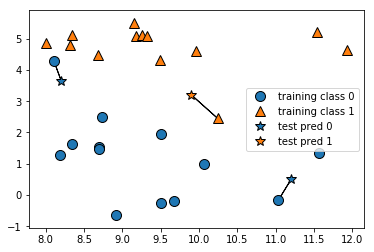

In [2]:
## k=1の時は一番近いデータを同じクラスとする
mglearn.plots.plot_knn_classification(n_neighbors=1)

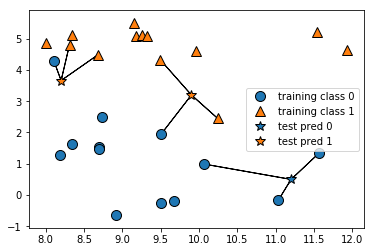

In [3]:
# k=3の時は3つのウチの多数決でクラスを決める
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
# 訓練データとテストデータの準備
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# 7:3でスプリット
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# K最近傍法のskitlearnのクラスを初期化(k=3)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
# 訓練データで分類器の訓練を行う
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
# テストデータに対して予測を行う
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [10]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


KNeighborsClassifierの解析
-------------------------
* 2次元のデータ・セットについては、xy平面の全ての点について、予測結果を表示することができる
* 平面をそこに点があったとしたら分類されていたであろうクラスに従って色分けする
* こうするとアルゴリズムがクラス0に割り当てる場合とクラス1に割り当てる場合の`決定境界`が見える

### Kが1,3,9の場合の決定境界の描画

In [33]:
print(X.shape)

(26, 2)


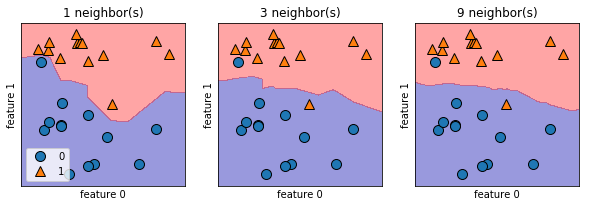

In [35]:
# グラフの枠を3つ容易
# figが多分画像全体の情報?
# axesがグラフのオブジェクト
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので1行でインスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    # グラフに対して描画を補助してくれるメソッドっぽい
    # 引数1: 分類器
    # 引数2: データ
    # 引数fill: 背景を塗りつぶすか
    # 引数eps: わからないこれを大きすすると余白が大きくなる
    # 引数ax: グラフオブジェクト
    # alpha: 色合いの濃さ
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    # 各データをプロットする
    # 引数1: クラス0のデータ
    # 引数2: クラス1のデータ
    # 引数3: 正解ラベル
    # ax: グラフオブジェクト
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
# 一つ目のグラフに凡例をつける(locはlocation=場所)
axes[0].legend(loc=3)

- 最近傍点が少ないと決定境界は訓練データに近くなる
- 最近傍点が多くなるほど決定境界はより滑らかになる

cancerデータセットを使った検証
----------------------


(569, 30)
(426, 30)
(143, 30)


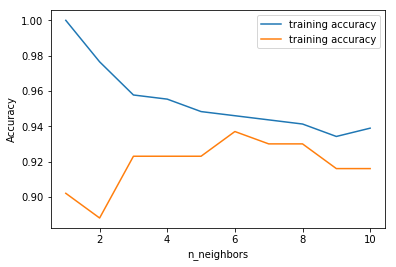

In [43]:
# 肺がんのデータセットを読みこむ
from sklearn.datasets import load_breast_cancer
# test分割用の関数を読み込む
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# データ読み込み
cancer = load_breast_cancer()

# random_state: 乱数シード値
# stratify Stratified Sampling (層化サンプリング) を行なう場合に、クラスを示す行列を設定する
# このケースは多分指定しなくても大丈夫?
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)
print(cancer.data.shape)
print(X_train.shape)
print(X_test.shape)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train,  y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
#print(training_accuracy)
#print(test_accuracy)

# 表の描画(x, y, label(凡例に表示する))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
# 凡例の表示
plt.legend()

- 一つの最近傍点だけを考慮する場合には、訓練セットの予測は完璧(1.0)
- より多くの最近傍点を考慮するとモデルはシンプルになり訓練精度は低下する
- テストセットに対する精度は一つの場合の方が多くの最近傍点を考慮するよりも低い
    - 一つの最近傍点ではモデルが複雑過ぎるため
- 10個の最近傍点を考慮するとモデルがシンプルになりすぎ、性能はさらに低下する
- 大体6位が一番精度が高い(88%程度)
